In [9]:
import psycopg2
import pandas as pd

In [17]:
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="mysecretpassword")
cur = conn.cursor()

In [32]:
def getTable(name):
  cur.execute('SELECT * from ' + name)
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

def getAverageHDI():
  cur.execute("select AVG(F.hdi), C.short_name FROM fact as F, country as C, event as E WHERE F.country_key = C.key and F.event_key = E.key Group by C.short_name order by avg desc")
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])


                      avg     short_name
0  0.91747899159663865546  United States
1  0.91087096774193548387         Canada
2  0.75793181818181818182         Mexico
3  0.74082269503546099291         Brazil
4  0.69961555806087936866          China
5  0.59452631578947368421          India
6  0.56823404255319148936     Bangladesh
7  0.49454285714285714286          Sudan
8  0.37659090909090909091          Niger


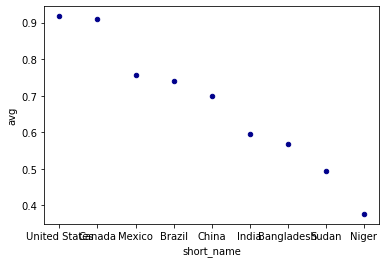

In [33]:
hdis = getAverageHDI()
print(hdis)

ax1 = hdis.plot.scatter(x='short_name', y='avg', c='DarkBlue')